In [1]:
import os

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../../../AutexysHost/source')
    
import numpy as np    
    
from utilities import DataLoggerUtility as dlu
from utilities import DataPlotterUtility as dpu
mplu = dpu.mplu
from utilities import FET_Modeling as fet_model
#from procedures import Device_History as DH

%config InlineBackend.figure_format = 'png'

In [150]:
'''
data_hand_rinse  = dlu.loadSpecificDeviceHistory('../../AutexysData/cesar/PrintedCNTs1/JP1/J/62-63', 'GateSweep.json', minExperiment=1, maxExperiment=1)
data_bath_rinse  = dlu.loadSpecificDeviceHistory('../../AutexysData/cesar/PrintedCNTs1/JP1/A/50-51', 'GateSweep.json', minExperiment=1, maxExperiment=1)
data_combo_rinse = dlu.loadSpecificDeviceHistory('../../AutexysData/cesar/PrintedCNTs1/JP1/G/1-2', 'GateSweep.json', minExperiment=2, maxExperiment=2)

fig1, (ax1,) = dpu.makeDevicePlot('SubthresholdCurve', data_hand_rinse, data_hand_rinse[0]['Identifiers'], mode_parameters={'enableLegend':True, 'enableColorBar':True, 'sweepDirection':'both', 'publication_mode':False, 'ylim':{'bottom':1e-11, 'top':1e-5}, 'legendLoc':'lower left'})
fig3, (ax3,) = dpu.makeDevicePlot('TransferCurve', data_hand_rinse, data_hand_rinse[0]['Identifiers'], mode_parameters={'enableLegend':True, 'enableColorBar':True, 'sweepDirection':'both', 'publication_mode':False, 'ylim':{'bottom':1e-11, 'top':1e-5}, 'legendLoc':'lower left'})
dpu.saveExternalPlot(fig1, 'PrintedCNTs_handrinse')

fig2, ax2 = dpu.makeBlankPlot(figsize=(2,2))
ax2.set_xlabel('$V_{{GS}}$ (V)')
ax2.set_ylabel('$\\Delta g_{{m}}$ (V)')

ax2.plot([1,2], [3,4])

dpu.saveExternalPlot(fig2, 'SpecialPlot')

fig2
'''

"\ndata_hand_rinse  = dlu.loadSpecificDeviceHistory('../../AutexysData/cesar/PrintedCNTs1/JP1/J/62-63', 'GateSweep.json', minExperiment=1, maxExperiment=1)\ndata_bath_rinse  = dlu.loadSpecificDeviceHistory('../../AutexysData/cesar/PrintedCNTs1/JP1/A/50-51', 'GateSweep.json', minExperiment=1, maxExperiment=1)\ndata_combo_rinse = dlu.loadSpecificDeviceHistory('../../AutexysData/cesar/PrintedCNTs1/JP1/G/1-2', 'GateSweep.json', minExperiment=2, maxExperiment=2)\n\nfig1, (ax1,) = dpu.makeDevicePlot('SubthresholdCurve', data_hand_rinse, data_hand_rinse[0]['Identifiers'], mode_parameters={'enableLegend':True, 'enableColorBar':True, 'sweepDirection':'both', 'publication_mode':False, 'ylim':{'bottom':1e-11, 'top':1e-5}, 'legendLoc':'lower left'})\nfig3, (ax3,) = dpu.makeDevicePlot('TransferCurve', data_hand_rinse, data_hand_rinse[0]['Identifiers'], mode_parameters={'enableLegend':True, 'enableColorBar':True, 'sweepDirection':'both', 'publication_mode':False, 'ylim':{'bottom':1e-11, 'top':1e-5},

H2O Control

H2O 0.01V DS

H2O 0.1V DS

H2O 0.3V DS

H2O 0.5V DS

H2O 0.7V DS

H2O 0.9V DS

H2O 1.0V DS

Saving figures.
Figures saved. (Seconds elapsed: 0.978830099105835)
Saving figures.
Figures saved. (Seconds elapsed: 1.0788650512695312)
Saving figures.
Figures saved. (Seconds elapsed: 0.8315439224243164)
Saving figures.
Figures saved. (Seconds elapsed: 0.7728822231292725)
Saving figures.
Figures saved. (Seconds elapsed: 0.8506619930267334)
Saving figures.
Figures saved. (Seconds elapsed: 0.7134819030761719)
Saving figures.
Figures saved. (Seconds elapsed: 0.7058911323547363)


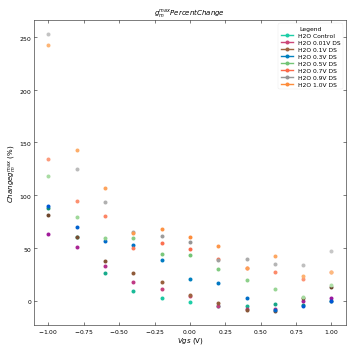

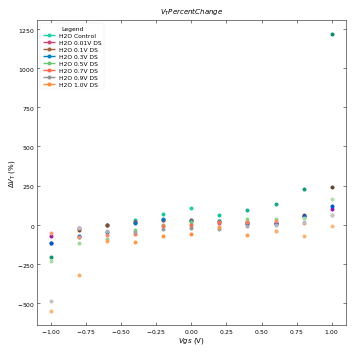

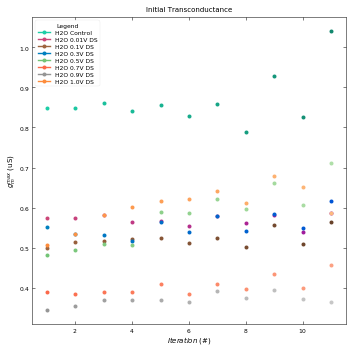

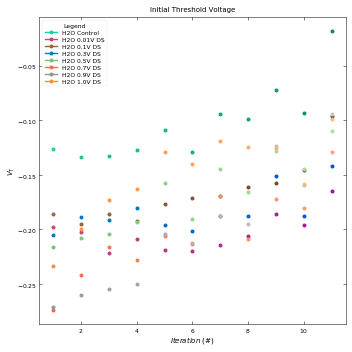

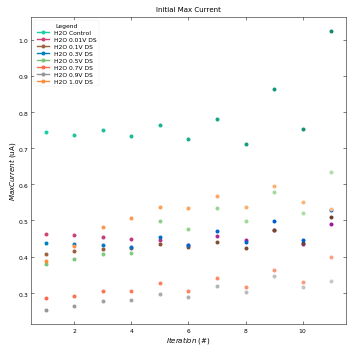

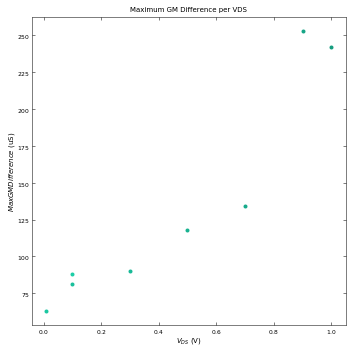

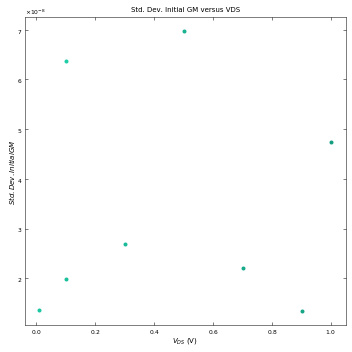

In [2]:
figsize = (5.0, 5.0)

#experiments = [44, 49, 54, 59]
#experiments = range(140, 171, 3) # pbs, flushed
h2o_immediate_experiments = [range(189, 221, 3), '33-34', 'H2O Immediate Flush'] # water, immediate flush; only 30GS
pbs_immediate_experiments = [range(227, 258, 3), '33-34', 'PBS Immediate Flush'] # pbs, immediate flush; only 30GS
#experiments = [67, 71, 75, 79]

#experiments = range(18, 50, 3) # h2o not overnight, same as below experiment
h2o_overnight_experiments = [range(56, 87, 3), '53-54', 'H2O Control'] # h2o overnight, 0s delay b/w GS
pbs_overnight_experiments = [range(99, 130, 3), '53-54', 'PBS Control'] # pbs overnight 8 hrs, 0s delay b/w GS
h2o_001ds_experiments = [range(135, 166, 3), '53-54', 'H2O 0.01V DS'] # h2O, overnight 4 hrs, 0.01V ds, 0s delay b/w GS
h2o_0Vbw_experiments = [range(170, 212, 4), '53-54', 'H2O 0.0V G b/w'] # h2O, 0V gated in between
h2o_01ds_10secdelay_experiments = [range(252, 283, 3), '53-54', 'H2O 0.1V DS'] # h2O, 10 sec delay GSs
h2o_05ds_10secdelay_experiments = [range(287, 318, 3), '53-54', 'H2O 0.5V DS'] # h2o, 10 sec delay, 0.5V ds
h2o_03ds_10secdelay_experiments = [range(322, 353, 3), '53-54', 'H2O 0.3V DS'] # h2o, 10 sec delay, 0.3V ds
h2o_001ds_10secdelay_experiments = [range(356, 387, 3), '53-54', 'H2O 0.01V DS'] # h2o, 10 sec delay, 0.01V ds
h2o_1ds_10secdelay_experiments = [range(391, 422, 3), '53-54', 'H2O 1.0V DS']
h2o_07ds_10secdelay_experiments = [range(426, 457, 3), '53-54', 'H2O 0.7V DS']
h2o_09ds_10secdelay_experiments = [range(461, 492, 3), '53-54', 'H2O 0.9V DS']

e_list = [h2o_overnight_experiments,
          h2o_001ds_10secdelay_experiments, 
          h2o_01ds_10secdelay_experiments, 
          h2o_03ds_10secdelay_experiments, 
          h2o_05ds_10secdelay_experiments,
          h2o_07ds_10secdelay_experiments,
          h2o_09ds_10secdelay_experiments,
          h2o_1ds_10secdelay_experiments]

total_experiments = [i[0] for i in e_list]
devices = [i[1] for i in e_list]
total_experiments_names = [i[2] for i in e_list]


# define forward, or backward, sweep
direction = 0

total_vgs = []
total_vts = []
total_gms = []

total_initial_gms = []
total_initial_vts = []
total_initial_max_currents = []


# measure: Vds versus maximum gm difference
total_maximum_gms = []
total_std_initial_gms = []
total_vds = []

experiment_counter = 0
for experiments in total_experiments:
    print(total_experiments_names[experiment_counter])
    final_vgs = []
    final_vts = []
    final_gms = []

    initial_gms = []
    initial_vts = []
    initial_max_currents = []

    counter = 0

    very_initial_gm = 0
    very_initial_vt = 0
    print()
    for experiment in experiments:
        counter += 1
        device = devices[experiment_counter]
        data_long  = dlu.loadSpecificDeviceHistory('../../AutexysData/nathan/C148FlowSNRWaterSugar/C148/A/' + device, 'GateSweep.json', minExperiment=experiment, maxExperiment=experiment) 
        data_long_staticbias  = dlu.loadSpecificDeviceHistory('../../AutexysData/nathan/C148FlowSNRWaterSugar/C148/A/' + device, 'StaticBias.json', minExperiment=experiment, maxExperiment=experiment) 
        vgs_setpoint = data_long_staticbias[0]['runConfigs']['StaticBias']['gateVoltageSetPoint']
        vds_setpoint = data_long_staticbias[0]['runConfigs']['StaticBias']['drainVoltageSetPoint']
        

        initial_vgs_data = data_long[0]['Results']['vgs_data'][direction]    
        initial_id_data = data_long[0]['Results']['id_data'][direction]
        initial_max_currents.append(max(initial_id_data))
        bias_metrics = fet_model.FET_Metrics(initial_vgs_data, initial_id_data)
        initial_vt = bias_metrics['V_T']
        initial_gm = bias_metrics['g_m_max'] 

        # very initial gm max (i.e: starting gm and vt values)
        if counter == 1:
            very_initial_gm = initial_gm
            very_initial_vt = initial_vt
            total_vds.append(vds_setpoint)

        initial_gms.append(initial_gm)
        initial_vts.append(initial_vt)
        #go through all the remaining gate sweeps, and calculate transconductance & threshold voltages
        gms = []
        Vts = []
        for i in range(1, len(data_long)):
            vgs_data = data_long[i]['Results']['vgs_data'][direction]    
            id_data = data_long[i]['Results']['id_data'][direction]
            bias_metrics = fet_model.FET_Metrics(vgs_data, id_data)
            V_T = bias_metrics['V_T']
            gm_max = bias_metrics['g_m_max']
            Vts.append(V_T)
            gms.append(gm_max)

        percent_diff_gms = []
        percent_diff_vts = []
        for j in range(len(gms)):

            # === Calculate GMs ===

            #percent_diff_gm = initial_gm

            percent_diff_gm = (gms[j] - initial_gm) / (initial_gm) * 100

            #percent_diff_gm = gms[j]

            #percent_diff_gm = (gms[j] - initial_gm)*1e6

            #percent_diff_gm = gms[j] - very_initial_gm

            percent_diff_gms.append(percent_diff_gm)

            # === Calculate VTs ===

            percent_diff_vt = ((Vts[j] - initial_vt)) / (initial_vt) * 100

            #percent_diff_vt = Vts[j]

            #percent_diff_vt = Vts[j] - very_initial_vt

            #percent_diff_vt = Vts[j] - initial_vt
            percent_diff_vts.append(percent_diff_vt)

        #print(vgs_setpoint, np.mean(percent_diff_vts))
        final_vgs.append(vgs_setpoint)

        #final_vts.append(np.mean(percent_diff_vts))
        #final_gms.append(np.mean(percent_diff_gms))

        # use the very last gatesweeps' vt/gm values
        final_vts.append(percent_diff_vts[len(percent_diff_vts) - 1])
        final_gms.append(percent_diff_gms[len(percent_diff_gms) - 1])
    
    total_vgs.append(final_vgs)
    total_vts.append(final_vts)
    total_gms.append(final_gms)
    total_maximum_gms.append(max(final_gms))

    total_initial_gms.append(initial_gms)
    total_initial_vts.append(initial_vts)
    total_initial_max_currents.append(initial_max_currents)
    total_std_initial_gms.append(np.std(initial_gms))
    
    experiment_counter += 1

colors = [mplu.setupColors(None, 20, colorMapName='white_teal_black', colorMapStart=0.5, colorMapEnd=0.18), 
          mplu.setupColors(None, 20, colorMapName='plasma', colorMapStart=0.5, colorMapEnd=0.18), 
          mplu.setupColors(None, 20, colorMapName='copper', colorMapStart=0.5, colorMapEnd=0.18),
          mplu.setupColors(None, 20, colorMapName='winter', colorMapStart=0.5, colorMapEnd=0.18),
          mplu.setupColors(None, 20, colorMapName='Greens', colorMapStart=0.5, colorMapEnd=0.18),
          mplu.setupColors(None, 20, colorMapName='Reds', colorMapStart=0.5, colorMapEnd=0.18),
          mplu.setupColors(None, 20, colorMapName='Greys', colorMapStart=0.5, colorMapEnd=0.18),
          mplu.setupColors(None, 20, colorMapName='Oranges', colorMapStart=0.5, colorMapEnd=0.18)]

# === Percent change gms Plot ===    
fig1, ax1 = dpu.makeBlankPlot(figsize=figsize)
ax1.set_xlabel('$ Vgs $ (V)')
ax1.set_ylabel('$ Change g^{max}_{{m}}} $ (%)')
ax1.set_title("$ g^{max}_{{m}} Percent Change $")
for i in range(len(total_vgs)):
    final_vgs = total_vgs[i]
    final_gms = total_gms[i]
    for k in range(len(final_vgs)):
        label = ""
        if k == 0:
            label = total_experiments_names[i]
        ax1.plot(final_vgs[k], final_gms[k], color=colors[i][k], marker='o', markersize=4, label=label)   
mplu.addLegend(ax1, "best", "Legend")
dpu.saveExternalPlot(fig1, 'PercentGMsperVGS')

# === Percent change V_T Plot ===    
fig2, ax2 = dpu.makeBlankPlot(figsize=figsize)
ax2.set_xlabel('$ Vgs $ (V)')
ax2.set_ylabel('$ \\Delta V_{{T}}} $ (%)')
ax2.set_title('$ V_{{T}}  Percent Change $')
for i in range(len(total_vgs)):
    final_vgs = total_vgs[i]
    final_vts = total_vts[i]
    for k in range(len(final_vgs)):
        label = ""
        if k == 0:
            label = total_experiments_names[i]
        ax2.plot(final_vgs[k], final_vts[k], color=colors[i][k], marker='o', markersize=4, label=label, linestyle='dashed')     
mplu.addLegend(ax2, "best", "Legend")
dpu.saveExternalPlot(fig2, 'PercentVTsperVGS')

# === initial VTs and GMs Plot ===
fig3, ax3 = dpu.makeBlankPlot(figsize=figsize)
ax3.set_ylabel('$ g^{max}_{{m}}} $ (uS)')
ax3.set_xlabel('$ Iteration $ (#)')
ax3.set_title("Initial Transconductance")
for i in range(len(total_vgs)):
    initial_gms = total_initial_gms[i]
    final_vgs = total_vgs[i]
    for k in range(len(final_vgs)): # final_vgs[k]
        label = ""
        if k == 0:
            label = total_experiments_names[i]
        ax3.plot(k+1, initial_gms[k] * 1e6, color=colors[i][k], marker='o', markersize=4, label=label)
mplu.addLegend(ax3, "best", "Legend")
dpu.saveExternalPlot(fig3, 'InitialGmsperVGS')

fig4, ax4 = dpu.makeBlankPlot(figsize=figsize)
ax4.set_ylabel("$ V_{{T}}} $")
ax4.set_xlabel('$ Iteration $ (#)')
ax4.set_title('Initial Threshold Voltage')
for i in range(len(total_vgs)):
    initial_vts = total_initial_vts[i]
    final_vgs = total_vgs[i]
    for k in range(len(final_vgs)): # final_vgs[k], 
        label = ""
        if k == 0:
            label = total_experiments_names[i]
        ax4.plot(k+1, initial_vts[k], color=colors[i][k], marker='o', markersize=4, label=label)
mplu.addLegend(ax4, "best", "Legend")
dpu.saveExternalPlot(fig4, 'InitialVTsperVGS')

# === initial max current plot ===
fig5, ax5 = dpu.makeBlankPlot(figsize=figsize)
ax5.set_ylabel("$ Max Current $ (uA)")
ax5.set_xlabel('$ Iteration $ (#)')
ax5.set_title('Initial Max Current')
for i in range(len(total_vgs)):
    initial_max_currents = total_initial_max_currents[i]
    final_vgs = total_vgs[i]
    for k in range(len(final_vgs)):
        label = ""
        if k == 0:
            label = total_experiments_names[i]
        ax5.plot(k+1, initial_max_currents[k] * 1e6, color=colors[i][k], marker='o', markersize=4, label=label)
mplu.addLegend(ax5, "best", "Legend")
dpu.saveExternalPlot(fig5, 'InitialMaxCurrentperVGS')

# === Vds versus Maximum GM difference ===
fig6, ax6 = dpu.makeBlankPlot(figsize=figsize)
ax6.set_ylabel("$ Max GM Difference $ (uS)")
ax6.set_xlabel('$ V_{DS} $ (V)')
ax6.set_title('Maximum GM Difference per VDS')
for i in range(len(total_vds)):
    vds = total_vds[i]
    max_gm = total_maximum_gms[i]
    ax6.plot(vds, max_gm, color=colors[0][i], marker='o', markersize=4)
dpu.saveExternalPlot(fig6, 'VdsVersusMaxGMDifference')

# === Vds versus initial GM standard deviation
fig7, ax7 = dpu.makeBlankPlot(figsize=figsize)
ax7.set_ylabel("$ Std. Dev. Initial GM $")
ax7.set_xlabel("$ V_{DS} $ (V)")
ax7.set_title("Std. Dev. Initial GM versus VDS")
for i in range(len(total_vds)):
    vds = total_vds[i]
    std_gm = total_std_initial_gms[i]
    ax7.plot(vds, std_gm, color=colors[0][i], marker='o', markersize=4)
dpu.saveExternalPlot(fig7, 'StdDevInitialGMvsVDS')


0.0 0.0
4.6652691222222225e-09 8.688028666666665e-09
-0.2 -0.2
1.0966006666666667e-08 1.8774617555555557e-08
0.2 0.2
1.1097247999999998e-09 1.9688166666666665e-09
-0.4 -0.4
2.479305366666667e-08 3.799168111111111e-08
0.4 0.4
-2.7395691333333335e-09 -4.012831844444444e-09
-0.6 -0.6
5.7081777555555556e-08 8.34309148888889e-08
0.6 0.6
-7.010730433333333e-09 -1.0178504444444443e-08
-0.8 -0.8
1.2827087e-07 1.8006430777777778e-07
0.8 0.8
-1.2206643222222222e-08 -1.7374517e-08
-1.0 -1.0
2.6613871e-07 3.404386066666666e-07
1.0 1.0
-1.7813997222222226e-08 -2.4983350444444443e-08
water vt average, std
-0.32609560885052596 0.015159141843777405
other vt average, std
-0.2837435222899972 0.022505798279280682
total vt average
-0.30491956557026156
{0.0: 31.993821399425606, -0.2: 37.005343564610556, 0.2: 14.803861943793445, -0.4: 40.776081011055815, 0.4: 10.198006685134153, -0.6: 72.32649424271325, 0.6: 71.06835419430564, -0.8: 53.71374252178909, 0.8: 24.978771942674364, -1.0: 22.741736859518156, 1.0: 

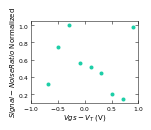

In [3]:
# === SNR Plots ===
device = '33-34'
water_experiments = range(189, 221, 3)
other_experiments = range(227, 258, 3)
#experiments = [44, 49, 54, 59]
#experiments = range(140, 171, 3)
#experiments = [67, 71, 75, 79]

#device = '53-54'
#water_experiments = range(18, 50, 3)
#water_experiments = range(56, 87, 3) # h2o overnight
#other_experiments = range(99, 130, 3) # pbs overnight 8 hrs

#water_experiments = range(135, 166, 3) # h2O, overnight 4 hrs, 0.01V ds
#water_experiments = range(170, 212, 4) # h2O, 0V gated in between
#water_experiments = range(252, 283, 3) # h2O, 10 sec delay GSs


data_long  = dlu.loadSpecificDeviceHistory('../../AutexysData/nathan/C148FlowSNRWaterSugar/C148/A/' + device, 'StaticBias.json', minExperiment=137, maxExperiment=171) 
data_all = data_long

water_values = {}
other_values = {}
Vt_average_water = []
Vt_average_other = []
for experiment in range(len(water_experiments)):
    
    water_data_long_staticbias  = dlu.loadSpecificDeviceHistory('../../AutexysData/nathan/C148FlowSNRWaterSugar/C148/A/' + device, 'StaticBias.json', minExperiment=water_experiments[experiment], maxExperiment=water_experiments[experiment]) 
    other_data_long_staticbias = dlu.loadSpecificDeviceHistory('../../AutexysData/nathan/C148FlowSNRWaterSugar/C148/A/' + device, 'StaticBias.json', minExperiment=other_experiments[experiment], maxExperiment=other_experiments[experiment]) 
    
    # calculate Vts
    data_gatesweep_water = dlu.loadSpecificDeviceHistory('../../AutexysData/nathan/C148FlowSNRWaterSugar/C148/A/' + device, 'GateSweep.json', minExperiment=water_experiments[experiment], maxExperiment=water_experiments[experiment]) 
    data_gatesweep_other = dlu.loadSpecificDeviceHistory('../../AutexysData/nathan/C148FlowSNRWaterSugar/C148/A/' + device, 'GateSweep.json', minExperiment=other_experiments[experiment], maxExperiment=other_experiments[experiment]) 
    Vts_water = []
    Vts_other = []
    for direction in range(0, 2):
        both_Vts = []
        for i in range(int(len(data_gatesweep_water)/(4/1)), int(len(data_gatesweep_water)/(4/3))):
            vgs_data = data_gatesweep_water[i]['Results']['vgs_data'][direction]    
            id_data = data_gatesweep_water[i]['Results']['id_data'][direction]
            bias_metrics = fet_model.FET_Metrics(vgs_data, id_data)
            V_T = bias_metrics['V_T']
            both_Vts.append(V_T)
        Vts_water.append(np.mean(both_Vts))
    Vt_average_water.append(np.mean(Vts_water))
    for direction in range(0, 2):
        both_Vts = []
        for i in range(int(len(data_gatesweep_other)/(4/1)), int(len(data_gatesweep_other)/(4/3))):
            vgs_data = data_gatesweep_other[i]['Results']['vgs_data'][direction]    
            id_data = data_gatesweep_other[i]['Results']['id_data'][direction]
            bias_metrics = fet_model.FET_Metrics(vgs_data, id_data)
            V_T = bias_metrics['V_T']
            both_Vts.append(V_T)
        Vts_other.append(np.mean(both_Vts))
    Vt_average_other.append(np.mean(Vts_other))
    
    # define vgs, as it is constant for both experiments; get it from the first static bias it sees
    water_vgs_setpoint = water_data_long_staticbias[0]['runConfigs']['StaticBias']['gateVoltageSetPoint']
    other_vgs_setpoint = other_data_long_staticbias[0]['runConfigs']['StaticBias']['gateVoltageSetPoint']
    # go through water static biases, obtain mean & std values; if more than one, just average them
    water_means = []
    water_stds = []
    for i in range(len(water_data_long_staticbias)):
        id_data = water_data_long_staticbias[i]['Results']['id_data']
        mean = np.mean(id_data[int(len(id_data) / 2) :])
        std = np.std(id_data[int(len(id_data) / 2) :])
        water_means.append(mean)
        water_stds.append(std)
    other_means = []
    other_stds = []
    for j in range(len(other_data_long_staticbias)):
        id_data = other_data_long_staticbias[i]['Results']['id_data']
        mean = np.mean(id_data[int(len(id_data) / 2) :])
        std = np.std(id_data[int(len(id_data) / 2) :])
        other_means.append(mean)
        other_stds.append(std)
    
    water_final_mean = np.mean(water_means)
    water_final_std = np.mean(water_stds)
    other_final_mean = np.mean(other_means)
    other_final_std = np.mean(other_stds)
    
    print(water_vgs_setpoint, other_vgs_setpoint)
    print(water_final_mean, other_final_mean)
    
    water_values[water_vgs_setpoint] = (water_final_mean, water_final_std)
    other_values[other_vgs_setpoint] = (other_final_mean, other_final_std)

print("water vt average, std")
print(np.mean(Vt_average_water), np.std(Vt_average_water))
print("other vt average, std")
print(np.mean(Vt_average_other), np.std(Vt_average_other))
print("total vt average")
mean_vt = (np.mean(Vt_average_water) + np.mean(Vt_average_other) ) / 2
print(mean_vt)

snrs = {}
for key in water_values.keys():
    signal = abs(water_values[key][0] - other_values[key][0])
    noise = (water_values[key][1] + other_values[key][1]) / 2
    snrs[key] = signal / noise

print(snrs)

# === SNR Plot ===    
fig1, ax1 = dpu.makeBlankPlot(figsize=(2.2,1.8))

time_factor = 1/3600
#ax1.set_xticks([0,1,2,3,4,5,6])
ax1.set_xlabel('$ Vgs - V_{{T}} $ (V)')
ax1.set_ylabel('$ Signal-Noise Ratio $ Normalized')
colors = mplu.setupColors(None, len(final_vgs), colorMapName='white_teal_black', colorMapStart=0.5, colorMapEnd=0.18)
m = max(snrs.values())
for k in snrs.keys():
    ax1.plot(k - mean_vt, snrs[k] / m, color=colors[i], marker='o', markersize=4)
'''
for i in range(len(delta_VT.keys())):
    times = list(delta_VT.keys())
    x = time_factor * np.array([times[i]])
    y = [delta_VT[times[i]]]
    ax2.plot(x, y, color=colors[i], marker='o', markersize=4)
'''
ax1.set_xlim(-1, 1)          
dpu.saveExternalPlot(fig1, 'SNRPlot')
